### 회귀
- 소득이 증가하면 소비도 증가, 어떤 변수가 다른 변수에 영향을 준다면 두 변수 사이에 선형관계가 있다고 할 수 있음
- 두 변수 사이에 일대일로 대응되는 확률적, 통계적 상관성을 찾는 알고리즘을 Simple Linear Regression이라고 함
- 변수 X, Y에 대한 정보를 가지고 일차 방정식 계수 a,b를 찾는 과정이 단순회귀분석 알고리즘
- 회귀변수는 독립변수가 연속형 데이터일 때 사용 가능, 범주형 데이터는 연속형 데이터로 변환해야 사용 가능하다

### 회귀분석의 가정
- 회귀분석은 정규성, 선형성, 등분산성을 만족하는 데이터의 경우에 사용한다.

### 회귀 평가 지표
- MAE : 실제값과 예측값의 차이를 절대값으로 변환해 평균한 것
- MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
- RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
- R square : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
    - 1에 가까울 수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance</br></br>
    
- MAE, MSE, RMSE 오차의 정도를 본 것 -> 오차니까 작을수록 좋음
- R square은 높을수록 좋음 -> 설명력이 좋다

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('./dataset/auto-mpg.xlsx')
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [6]:
# unique()는 데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수입니다.
# horsepower 열의 고유값 확인
ndf.horsepower.unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [4]:
ndf.horsepower[ndf.horsepower=='?'] = np.nan  # ? -> NAN 으로 값 변경
ndf.dropna(subset=['horsepower'], axis=0, inplace=True) # 누락데이터 행을 삭제
ndf.horsepower = ndf.horsepower.astype('float') # float로 type 변경
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   mpg         392 non-null    float64
 1   cylinders   392 non-null    int64  
 2   horsepower  392 non-null    float64
 3   weight      392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.3 KB


In [8]:
# pkl 형태로 내보내기
ndf.to_pickle('./dataset/auto-mpg.pkl')

In [5]:
X = ndf[['weight']] #독립변수, 설명변수
y = ndf['mpg'] #종속변수, 결과변수, 반응변수

# 학습용 data와 검증용 data 만들어줌
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state =11)

<AxesSubplot:title={'center':'Regplot'}, xlabel='weight', ylabel='mpg'>

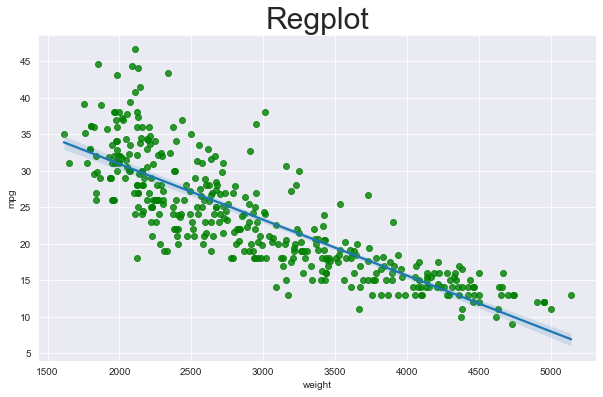

In [6]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(1,1, figsize=(10,6))
plt.title('Regplot', fontsize=30)
sns.regplot(ax=axes, x='weight', y='mpg', data = ndf, scatter_kws={'color':'green'})
# 각각 점들과 회귀식(파란것) 사이의 오차의 합을 최소화 하는것이 회귀식을 만드는 원리
# 기계 학습의 원리란?
# x값과 y값을 제공해준다 -> 계속 학습하면서 가장 최적의 회귀선 (기울기) 구하기 -> 
# y=ax+b 에서 a와 b를 구해줌 -> 회귀선이 구해짐 -> a는 회귀계수 b는 y절편 

In [16]:
from sklearn.linear_model import LinearRegression
# fit_transfrom은 변환할때 사용
# fit는 학습
lr = LinearRegression() # 객체생성
lr.fit(X_train,y_train) # 학습
# 이제 예측 할 수 있음
y_preds = lr.predict(X_test)

In [18]:
X_test # weight 값을 집어 넣으면

,weight
240,2190
390,2665
391,2370
236,2755
222,4060
...,...
190,4215
152,3264
125,3102
105,4654


In [19]:
y_preds  # 예측값 -> 파란색 회귀식에 의해 예측값을 구함 

array([29.27985295, 25.65957977, 27.90795996, 24.97363328, 15.02740907,
       16.26973439, 14.22713816, 25.60622838, 31.37580058, 25.24039025,
       29.77525875, 16.47551834, 12.13119053, 30.34688083, 18.19038459,
       30.23255642, 27.83174368, 21.96309032, 10.62210824, 27.64120299,
       24.7068763 , 17.18432972, 27.8927167 , 21.33049522, 10.15718895,
       29.18839342, 27.71741926, 29.05882575, 18.38092528, 20.36254849,
       31.20812477, 17.58065437,  7.88594388, 31.20812477, 14.8978414 ,
       26.15498558, 14.41005723, 23.525524  , 29.42466388, 24.63066003,
       29.00547435, 21.9021173 , 30.33925921, 30.8041785 , 26.04066116,
       29.52374504, 14.31097606, 30.70509734, 15.9420044 , 28.17471693,
       26.80282393, 19.86714269, 28.06039251, 24.4020112 , 29.88958317,
       27.45066229, 20.41589989, 21.63536032, 21.50579265, 23.0834696 ,
       15.16459837, 31.07093547, 30.95661105, 20.32444035,  8.20605224,
       24.82882235, 25.62147163, 14.03659747, 26.11687744, 27.42

In [8]:
# 회귀 계수
# weight와 mpg의 단위가 다르기 때문에 -> -0.00762163 -> 그래서 표준화, 정규화 해줘야함
print(f'기울기 : {lr.coef_}')
print(f'절편 : {lr.intercept_}')

기울기 : [-0.00762163]
절편 : 45.97121770475769


In [20]:
# 회귀방정식으로 모델을 구함 -> 그 모델을 평가  -> (오차율)회귀식과 실제 데이터 값 사이의 오차를 최소화함을 목표
# 오차율로 충분치 않음 -> 실제 변화에 대한 예측의 설명력을 구해줌 -> 분산 기반으로 한 R square
# sklearn에서는 루트 mean_squared_error는 없음 - > mean_squared_error를 구해서 넘파이써서 루트씌어줌
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test,y_preds) # 테스트 데이터, 예측 데이터 사이의 오차 구하기
rmse = np.sqrt(mse) # mse에 루트 씌어줌 -> root mean_squared_error
r_square = r2_score(y_test,y_preds) # 실제값의 분산 대비 예측값의 분산 비율을 구함
print(f'mse: {mse}, rmse: {rmse}, r_square: {r_square}') 
# 설명력 r_square ->  이 모델이 실제의 64%정도를 설명한다

# MSE : 실제값과 예측값의 차이를 제곱해 평균한 것
# RMSE : MSE에 루트를 씌운 것(실제 오류 평균보다 커지는 것을 보정)
# R square(설명력) : 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
# 1에 가까울 수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance

mse: 22.168955157340807, rmse: 4.70839199274453, r_square: 0.6410608728212728


<AxesSubplot:xlabel='mpg', ylabel='Density'>

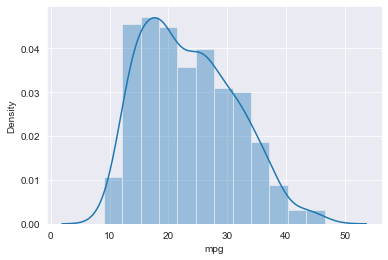

In [22]:
# 실제y값
sns.distplot(y,kde=True)

<AxesSubplot:ylabel='Density'>

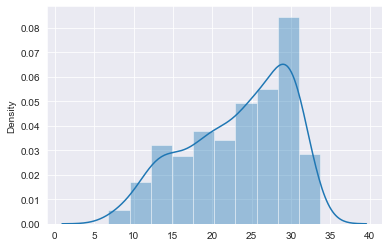

In [23]:
# 회귀식에 의해서 예측한 y값
y_hat = lr.predict(X) # 
sns.distplot(y_hat,kde=True)

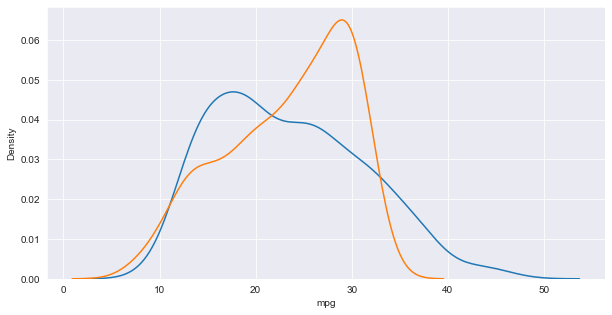

In [12]:
# 실제로 단순회귀는 많이 쓰이지 않음 why? -> 세상사에 단순한 문제는 많지 않기 때문
# 설명력 r_square 0.6밖에 안됨 -> 차이가 많이남
plt.figure(figsize=(10,5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat')
plt.show()
plt.close()

### 다항 회귀분석
- 독립변수가 2개이고 독립변수와 종속변수 관계가 1차 함수 이상인 관계
- 직선보다 곡선으로 설명하는 것이 적합할 경우 다항 함수를 사용하면 복잡한 곡선 형태의 회귀선을 표현할 수 있음
- 2차 함수 이상의 다항 함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘
- 다항회귀도 선형회귀임. 선형/비선형 회귀를 나누는 기준은 회귀계수가 선형/비선형인지에 따르며 독립변수의 선형/비선형 여부와는 무관함

In [7]:
import pandas as pd
df = pd.read_excel("./dataset/auto-mpg.xlsx")
ndf = df[['mpg','cylinders','horsepower','weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130,3504
1,15.0,8,165,3693
2,18.0,8,150,3436
3,16.0,8,150,3433
4,17.0,8,140,3449


In [8]:
X = ndf[['weight']]
y = ndf['mpg']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.3,
                                                   random_state = 10)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # 다항식 변환

In [53]:
poly = PolynomialFeatures(degree=2) # 객체 생성, degree=2 -> 2차원으로 
X_train_poly = poly.fit_transform(X_train) # X_train을 변환

# 2차항으로 바꿧는데 왜 3이 되었을까? -> 하나는 절편 x자승 x절편 -> 3개 나옴
print(X_train.shape)
print(X_train_poly.shape)

(278, 1)
(278, 3)


In [54]:
X_train_poly[:5]

array([[1.0000000e+00, 2.7200000e+03, 7.3984000e+06],
       [1.0000000e+00, 4.6150000e+03, 2.1298225e+07],
       [1.0000000e+00, 2.1350000e+03, 4.5582250e+06],
       [1.0000000e+00, 3.6200000e+03, 1.3104400e+07],
       [1.0000000e+00, 2.4510000e+03, 6.0074010e+06]])

In [35]:
# 차수 확인
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [55]:
# 학습시킬때 X_train_poly사용

pr = LinearRegression() # 객체 생성
pr.fit(X_train_poly, y_train) # 학습시켜줌

X_test_poly = poly.fit_transform(X_test) # X_test도 차수 변환
r_square = pr.score(X_test_poly, y_test) 
r_square #설명력 -> 72%

0.72554701541758

In [56]:
print(pr.coef_) # 계수
print(pr.intercept_) 

[ 0.00000000e+00 -1.69114181e-02  1.43451114e-06]
60.405921782601645


In [ ]:
# 2차로 축소한것 시각화
# 직선보다 곡선으로 하는것이 더 잘 반영된다
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

y_hat_test = pr.predict(X_test_poly)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_hat_test,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()
plt.close()

In [ ]:
import numpy as np
np.random.rand(100,1) # 0 ~ 1 균일분포

In [10]:
# [과제] X 데이터를 X_poly 데이터셋으로 변환하여 2차함수로 만들어진 데이터셋을 예측하고 시각화하세요
import numpy as np
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

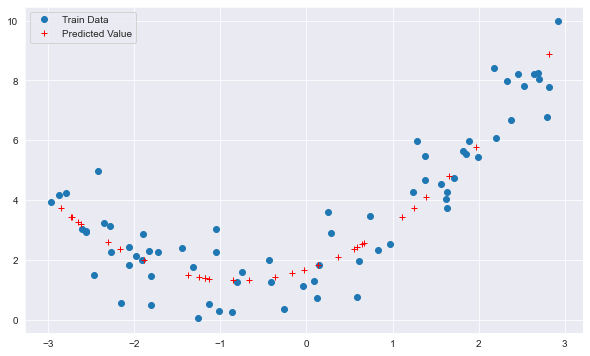

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 11)

# 2차 다항식으로 바꿈
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# 훈련 및 학습
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
y_preds = lr.predict(X_test_poly)

# 시각화
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(X_train,y_train,'o',label='Train Data')
ax.plot(X_test,y_preds,'r+', label='Predicted Value')
ax.legend(loc='best')
plt.show()
plt.close()

In [45]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

### 다중 회귀분석
- 여러 개의 독립변수가 종속변수에 영향을 주고 선형관계를 갖는 경우에 다중회귀분석을 사용
- 다중 회귀분석 알고리즘은 각 독립 변수의 계수와 상수항에 적절한 값들을 찾아서 모형을 완성
- 독립변수가 k개이며 종속변수와의 관계가 선형

In [25]:
import pandas as pd
df = pd.read_pickle('./dataset/auto-mpg.pkl')
df.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504
1,15.0,8,165.0,3693
2,18.0,8,150.0,3436
3,16.0,8,150.0,3433
4,17.0,8,140.0,3449


In [26]:
X = df.drop('mpg',axis=1) # cylinders, horespower, weight 독립변수
y =df['mpg'] # 종속변수

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

lr = LinearRegression() # 객체 생성
lr.fit(X_train, y_train) # X_train은 변수가 3개

y_preds = lr.predict(X_test) # 예측
r_square = lr.score(X_test,y_test)
round(r_square,4)

0.6939

In [30]:
# Q. mse, rmse, r_square(r2_score) 기울기, 절편

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)

print('MSE : {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds))) 

MSE : 17.330, RMSE: 4.163
Variance score : 0.694


In [ ]:
# [과제] y_test, y_hat 을 하나의 그래프로 비교하여 시각화

[과제] 아래 Boston 데이터 셋으로 보스턴 주택 가격 예측 모델을 만들고 평가하세요.

##### 독립변수, 설명변수, 입력변수(원인 : 예측값을 설명할 수 있는 변수)
- CRIM : 범죄율
- INDUS : 비소매상업지역 면적비율
- NOX : 일산화질소 농도
- RM : 주택당 방 수
- LSTAT : 인구 중 하위 계층 비율
- B : 인구 중 흑인 비율
- PTRATIO : 학생 / 교사 비율
- ZN : 25,000 평방피트를 초과 거주지역 비율
- CHAS : 찰스강의 경계에 위치한 경우 1, 아니면 0
- AGE : 1940년 이전에 건축된 주택의 비율
- RAD : 방사형 고속도로까지의 거리
- DIS : 직업센터의 거리
- TAX : 재산세율
##### 종속변수, 반응변수, 출력변수, 타켓변수, 결과변수(결과 : 예측하고자 하는 값)
- MEDV : 주택가격

In [8]:
from sklearn.datasets import load_boston
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

# boston 데이터 세트 로드
boston = load_boston()

# boston 데[이터 세트 datafrmae 변환
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)

# boston 데이터 세트의 target 배열은 주택 가격임. 이를 price컬럼으로 datframe에 추가
boston_df['PRICE'] = boston.target
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston_df.info()
# null값 없고 모두 float형

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
# 데이터의 X의 변수 확인
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [16]:
# 데이터의 Y의 변수 확인 (주택 가격)
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [20]:
# 데이터의 변수명 확인, 데이터의 규격 확인
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

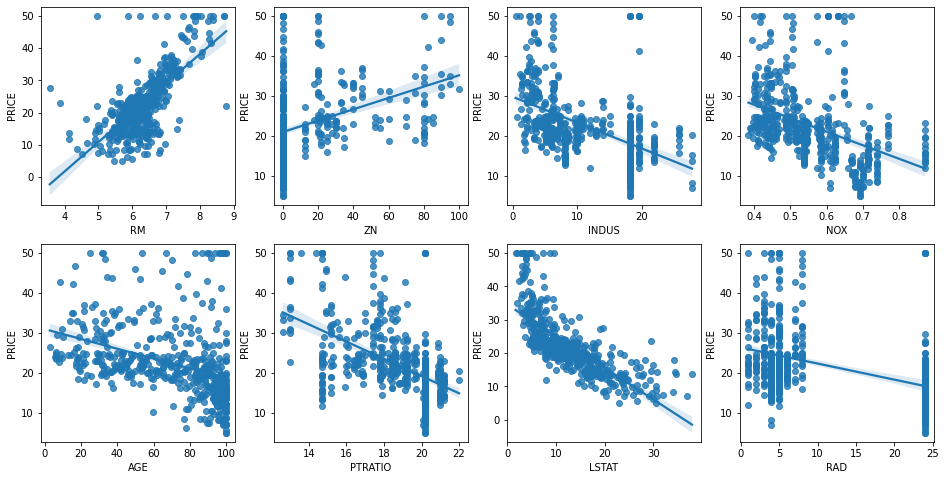

In [11]:
# 각 컬럼이 회귀 결과에 미치는 영향이 어느 정도인지 시각화해서 확인
# 2개의 행과 4개의 열을 가진 총 8개의 그래프를 행, 열 방향으로 그림
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features =['RM','ZN', 'INDUS', 'NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regpot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax=axs[row][col])
    
    # 다른 컬럼보다 RM과 LSTAT의 PRICE 영향도가 가장 두드러지게 나타난다.
    # RM은 양 방샹의 선형성 -> 방 크기가 클수록 가격이 증가
    # LSTAT(하위 계층의 비율) -> 음 방향의 선형성 LSTAT가 적을 수록 PRICE는 증가

In [12]:
# LinearRegression 이용해 보스턴 주택 가격 모델 생성
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test =train_test_split(X_data, y_target, test_size=0.3, random_state=156)

# 선형 회귀 OLS로 학습/예측/평가 수행
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds =lr.predict(X_test)

# 회귀 평가 지표 중에서 mse, rmse , r2_score측정
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r_square = r2_score(y_test,y_preds)

print('MSE : {0:.3f}, RMSE: {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds))) 
# r2_score -> 분산 기반으로 예측 성능을 평가. 실제값의 분산 대비 예측값의 분산 비율을 지표로 함
# 1에 가까울 수록 예측 정확도가 높음. 예측값 Variance / 실제값 Variance

MSE : 17.297, RMSE: 4.159
Variance score : 0.757


In [13]:
# LinearRegression으로 생성한 주택 가격 모델의 intercetp(절편)과 coefficients(회귀 계수) 값 확인
# y = ax + b -> a 회귀 계수 , b는 절편
print('절편 값 : ', lr.intercept_)
print('회귀 계수 값 :', np.round(lr.coef_, 1))

절편 값 :  40.9955951721646
회귀 계수 값 : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [18]:
# coef_ 속성은 회귀 계수 값만 가지고 있으므로 이를 피처별 회귀 계수 값으로 다시 매핑
# 높은 값 순으로 출력
# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성, 인덱스 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

# cross_val_score()로 5개 폴드 세트로 mse 구한 뒤 이를 기반으로 rmse 구함

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv = 5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring='neg_mean_squared_error')로 반환된 값은 모두 음수
print('5 folds 의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print('5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print('5 folds 의 평균 RMSE : {0:.3f}'.format(avg_rmse))

5 folds 의 개별 Negative MSE scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
5 folds 의 평균 RMSE : 5.829


-  사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델인 데 반해, 일반적으로 회귀는 mse값이 낮을수록 좋은 회귀 모델이다. 
- 따라서 metric 평가 기준에 mse를 부합시키기 위해서 scoring = 'neg_mean_squared_error'로 사이킷런의 Scoring 함수를 호출하면 모델에서 계산된 mse값에 -1을 곱해서 반환함
- 따라서 cross_val_score()에서 반환된 값에 다시 -1을 곱해야 양의 값인 원래 모델에서 계산된 mse 값이 된다.